In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
# This function displays the splits of the tree
from sklearn.tree import plot_tree
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
from sklearn.model_selection import GridSearchCV

In [3]:
file = 'Kaggle_Titanic_train.csv'
df_original = pd.read_csv(file)
df_original.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_original.shape

(891, 12)

In [5]:
df_original['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [11]:
df_original.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
df_dropped = df_original.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])
df_dropped.shape

(891, 8)

In [13]:
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [15]:
print('Age ', len(pd.unique(df_dropped['Age'])))
print('SibSp', len(pd.unique(df_dropped['SibSp'])))
print('Parch', len(pd.unique(df_dropped['Parch'])))
print('Fare', len(pd.unique(df_dropped['Fare'])))
print('Embarked', len(pd.unique(df_dropped['Embarked'])))


Age  89
SibSp 7
Parch 7
Fare 248
Embarked 4


In [16]:
df_dropped.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

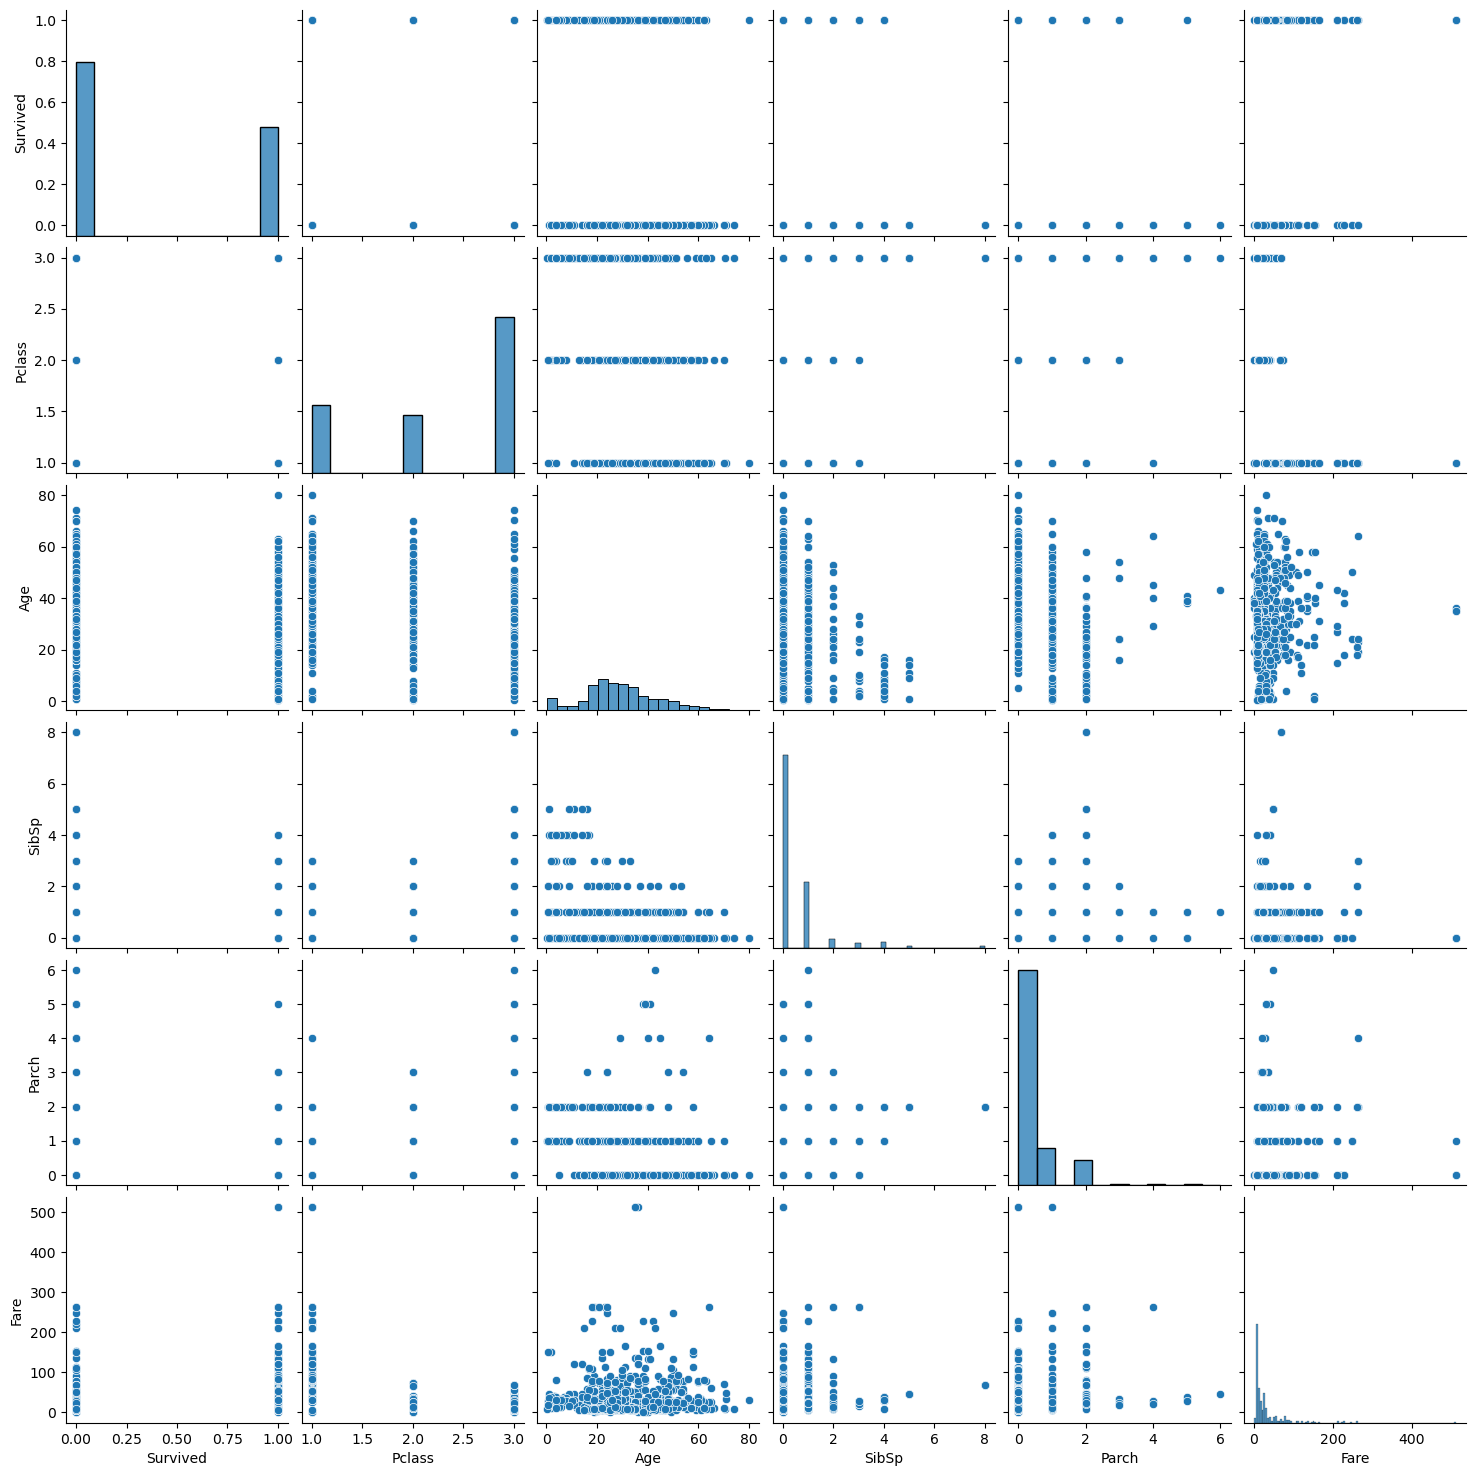

In [18]:
sns.pairplot(df_dropped)

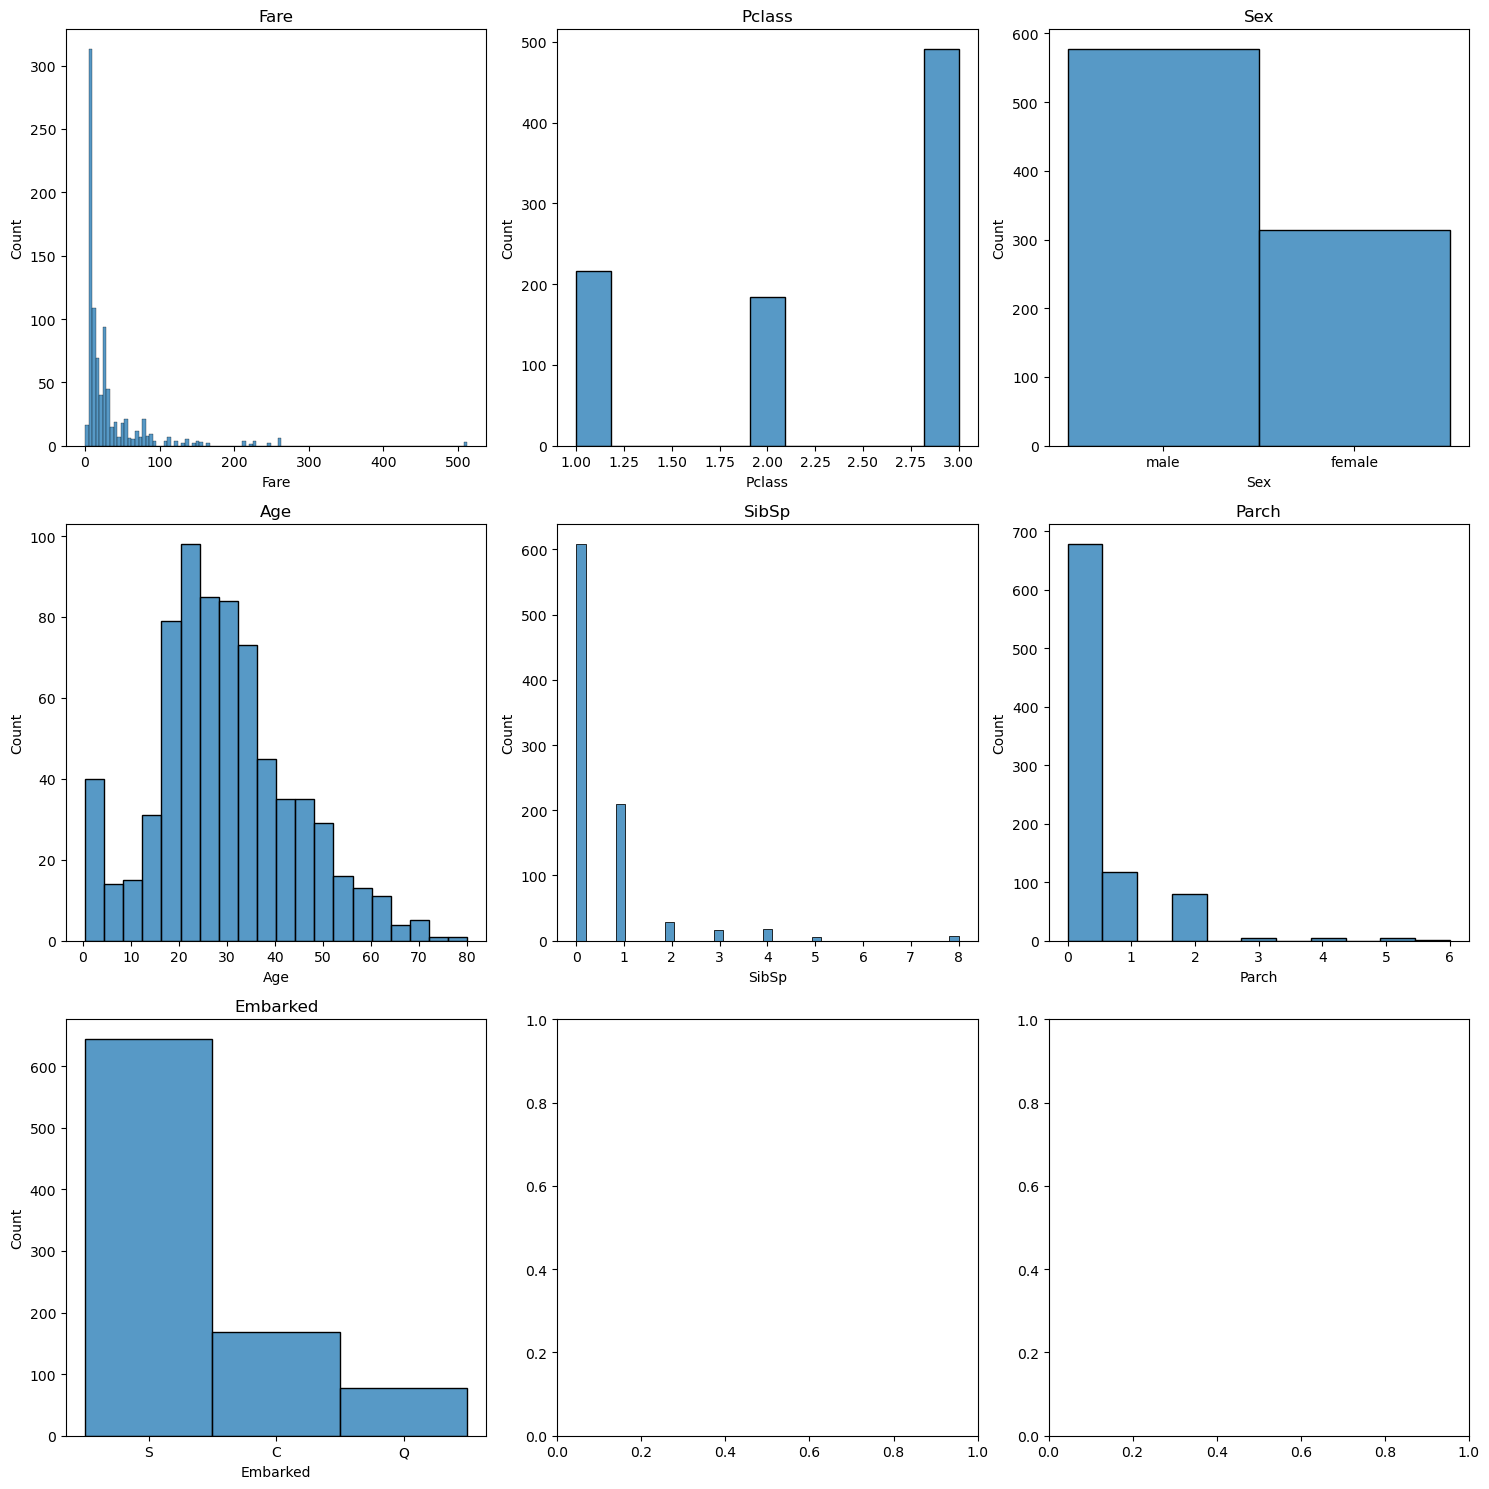

In [27]:
fig, axes = plt.subplots(3, 3, figsize = (15,15))

sns.histplot(df_dropped['Fare'], ax=axes[0,0])
axes[0,0].set_title('Fare')

sns.histplot(df_dropped['Pclass'], ax=axes[0,1])
axes[0,1].set_title('Pclass')

sns.histplot(df_dropped['Sex'], ax=axes[0,2])
axes[0,2].set_title('Sex')

sns.histplot(df_dropped['Age'], ax=axes[1,0])
axes[1,0].set_title('Age')

sns.histplot(df_dropped['SibSp'], ax=axes[1,1])
axes[1,1].set_title('SibSp')

sns.histplot(df_dropped['Parch'], ax=axes[1,2])
axes[1,2].set_title('Parch')

sns.histplot(df_dropped['Embarked'], ax=axes[2,0])
axes[2,0].set_title('Embarked')


plt.tight_layout()

plt.show()

In [42]:
df_dropped = pd.get_dummies(df_dropped, drop_first=True)
df_dropped

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,True,False,True
887,1,1,19.0,0,0,30.0000,False,False,True
888,0,3,NaN,1,2,23.4500,False,False,True
889,1,1,26.0,0,0,30.0000,True,False,False


In [43]:
X = df_dropped.drop(columns='Survived')
y = df_dropped['Survived']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25, 
                                                    stratify=y,
                                                    random_state=42)

In [45]:
tree_para = {'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50],
'min_samples_leaf': [2, 5, 10, 20, 50]}

In [46]:
scoring_metr = ['accuracy', 'precision', 'recall', 'f1']

In [47]:
tuned_decision_tree = DecisionTreeClassifier(random_state = 42)

In [48]:
clf = GridSearchCV(tuned_decision_tree,
                    tree_para,
                    scoring = scoring_metr,
                    cv=5,
                    refit="f1")

# Fit the model
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30,
                                       40, 50],
                         'min_samples_leaf': [2, 5, 10, 20, 50]},
             refit='f1', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [49]:
clf.best_estimator_

DecisionTreeClassifier(max_depth=6, min_samples_leaf=5, random_state=42)

In [50]:
tree_para_2 = {'max_depth':[4,5,6,7,8,9,10],
'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10]}


In [51]:
clf2 = GridSearchCV(tuned_decision_tree,
                    tree_para_2,
                    scoring = scoring_metr,
                    cv=5,
                    refit="f1")

# Fit the model
clf2.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
             refit='f1', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [52]:
clf2.best_estimator_

DecisionTreeClassifier(max_depth=6, min_samples_leaf=7, random_state=42)

In [53]:
print("Best Avg. Validation Score 1: ", "%.4f" % clf.best_score_)
print("Best Avg. Validation Score 2: ", "%.4f" % clf2.best_score_)

Best Avg. Validation Score 1:  0.7343
Best Avg. Validation Score 2:  0.7491


In [57]:
dt_pred = clf.predict(X_test)

# Generate performance metrics
print("Accuracy:", "%.3f" % accuracy_score(y_test, dt_pred))
print("Precision:", "%.3f" % precision_score(y_test, dt_pred))
print("Recall:", "%.3f" % recall_score(y_test, dt_pred))
print("F1 Score:", "%.3f" % f1_score(y_test, dt_pred))

Accuracy: 0.767
Precision: 0.736
Recall: 0.616
F1 Score: 0.671


In [58]:
dt_pred2 = clf2.predict(X_test)

# Generate performance metrics
print("Accuracy:", "%.3f" % accuracy_score(y_test, dt_pred2))
print("Precision:", "%.3f" % precision_score(y_test, dt_pred2))
print("Recall:", "%.3f" % recall_score(y_test, dt_pred2))
print("F1 Score:", "%.3f" % f1_score(y_test, dt_pred2))

Accuracy: 0.767
Precision: 0.793
Recall: 0.535
F1 Score: 0.639


In [ ]:
# decision_tree = DecisionTreeClassifier(random_state=0)


# decision_tree.fit(X, y, 
#                 max_depth=6,
#                 min_samples_leaf=5)


# dt_pred3 = decision_tree.predict(X_test)

In [63]:
tree_para_3 = {'max_depth':[5,6],
'min_samples_leaf': [5]}

In [64]:
clf3 = GridSearchCV(tuned_decision_tree,
                    tree_para_3,
                    scoring = scoring_metr,
                    cv=5,
                    refit="f1")

# Fit the model
clf3.fit(X, y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [5, 6], 'min_samples_leaf': [5]},
             refit='f1', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [65]:
clf3.best_estimator_

DecisionTreeClassifier(max_depth=6, min_samples_leaf=5, random_state=42)

In [59]:
file_test = 'Kaggle_Titanic_test.csv'
df_test = pd.read_csv(file_test)
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [67]:
df_test.shape

(418, 11)

In [66]:
df_test_dropped = df_test.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])
df_test_dropped = pd.get_dummies(df_test_dropped, drop_first=True)
df_test_dropped

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,True,True,False
1,3,47.0,1,0,7.0000,False,False,True
2,2,62.0,0,0,9.6875,True,True,False
3,3,27.0,0,0,8.6625,True,False,True
4,3,22.0,1,1,12.2875,False,False,True
...,...,...,...,...,...,...,...,...
413,3,NaN,0,0,8.0500,True,False,True
414,1,39.0,0,0,108.9000,False,False,False
415,3,38.5,0,0,7.2500,True,False,True
416,3,NaN,0,0,8.0500,True,False,True


In [68]:
df_test_dropped.isna().sum()

Pclass         0
Age           86
SibSp          0
Parch          0
Fare           1
Sex_male       0
Embarked_Q     0
Embarked_S     0
dtype: int64

In [69]:
dt_pred3 = clf3.predict(df_test_dropped)

In [75]:
answer_df = pd.DataFrame(df_test['PassengerId'])

In [76]:
answer_df

,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


In [77]:
answer_df['Survived'] = dt_pred3
answer_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [79]:
answer_df.to_csv('Kaggle_Titanic_MyOwnSolution_01_decision_tree.csv')